# Machine Suffering Group

**Members**: Joaquin Rodriguez, Kaci Santos, Katarina Valdez, Beverly Yu

# Introduction

Our group decided to use the dataset `Family Income and Expenditure Survey 2012 Vol. 1` taken from the Philippine Statistics Authority Website (PSADA). Filename for this dataset: `FIES PUF 2012 Vol.1.CSV`. Due to our curiosity with the subject of family income and expenditure and what possible classification or regression tasks we could implement it, along with its wide variety of cleaned features and instances, our group decided to use this dataset.

For our main task, we decided to try out **classification**, specifically predicting whether a family has electricity in their household or not. From the dataset, the `ELECTRIC` feature is represented by 1 = household has electricity; 2 = household has no electricity. 

# Dataset

The Family Income and Expenditure Survey (FIES) 2012 is a national survey conducted by the Philippine Statistics Authority (PSA) to gather comprehensive data on family income and spending patterns across households in the Philippines. The dataset provides insights into income distribution, expenditure habits, and economic well-being, helping policymakers, researchers, and analysts assess poverty levels, economic growth, and financial behavior among Filipino households.

In summary, the dataset inlcudes approximately **40,000+ instancea (rows)** with **119 features each (columns)**. Each row in the dataset represents each family or household surveyed, while the columns represent the features describing the statuses of their household. 

The list of features in the dataset are stated as follows:

### **Household and Demographic Information**
- `W_REGN, W_OID, W_SHSN, W_HCN`: Identifiers for region, household, and sample.
- `URB`: Urban or rural classification.
- `RSTR, PSU`: Sampling stratum and primary sampling unit.
- `BWEIGHT, RFACT`: Base and final survey weights.
- `FSIZE`: Total number of family members.
- `SEX, AGE, MS, HGC`: Gender, age, marital status, and highest education level of household head.
- `JOB, OCCUP, KB, CW`: Employment details of household head.
- `MEMBERS, AGELESS5, AGE5_17`: Family members' count and age distribution.
- `EMPLOYED_PAY, EMPLOYED_PROF`: Count of employed family members.
- `SPOUSE_EMP`: Employment status of spouse.

### **Income Sources**
- `AGRI_SAL, NONAGRI_SAL, WAGES`: Income from employment (agricultural & non-agricultural).
- `NETSHARE`: Income from net share of crops, fishing, livestock.
- `CASH_ABROAD, CASH_DOMESTIC`: Cash received from abroad/domestic sources.
- `RENTALS_REC, INTEREST, PENSION, DIVIDENDS, OTHER_SOURCE`: Passive income sources (rent, interest, pensions, investments).
- `NET_RECEIPT, REGFT`: Family sustenance income and received gifts.
- `EAINC, TOINC`: Total entrepreneurial income and total income.
- `LOSSES`: Losses from entrepreneurial activities.

### **Expenditure Categories**
- `T_FOOD (T_BREAD, T_MEAT, T_FISH, etc.)`: Food expenditures by category.
- `T_CLOTH, T_FURNISHING, T_HEALTH, T_HOUSING_WATER`: Clothing, household, medical, and housing expenses.
- `T_TRANSPORT, T_COMMUNICATION, T_RECREATION, T_EDUCATION`: Transport, communication, leisure, and education expenses.
- `T_MISCELLANEOUS, T_OTHER_EXPENDITURE, T_OTHER_DISBURSEMENT`: Other expenses including insurance, fees, and loan payments.
- `T_TOTEX, T_TOTDIS`: Total expenditure and total disbursements.

### **Housing and Assets**
- `HHTYPE`: Household type.
- `BLDG_TYPE, ROOF, WALLS, TENURE`: Housing characteristics.
- `HSE_ALTERTN, TOILET, ELECTRIC, WATER, DISTANCE`: House modifications, utilities, and water access.
- `RADIO_QTY, TV_QTY, PC_QTY, CAR_QTY, MOTORCYCLE_QTY, etc.`: Household appliances and vehicle ownership.

### **Economic Indicators**
- `POP_ADJ`: Population adjustment.
- `PCINC`: Per capita income.
- `NATPC, NATDC, REGPC, REGDC`: National and regional income deciles.

# Python Libaries and Modules

In order to run this notebook, we install the necessary libraries that will be used throughout the notebook.

Here are the list of Python libraries and modules used:  

- **`pandas`** – Used for data manipulation and analysis, particularly with structured data like tables (DataFrames).  
- **`numpy`** – Provides support for large, multi-dimensional arrays and matrices, along with mathematical functions.  
- **`matplotlib.pyplot`** – A plotting library used for creating static, animated, and interactive visualizations.  
- **`seaborn`** – Built on `matplotlib`, it simplifies statistical data visualization with attractive and informative graphs.  
- **`sklearn`** (scikit-learn) – A machine learning library for classification, regression, clustering, and preprocessing.

However, throughout this notebook, we might import additional libraries. Short description for those will be provided as well.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Data Preprocessing and Cleaning

While the data from PSADA is cleaned, there are still some outliers and missing values in the dataset. In order to train our model accurately, we did our own preprocessing and cleaning. The steps for this are stated in order below:

**1.) Standardizing Column Names**
- Column names were stripped of whitespace, converted to uppercase, and spaces were replaced with underscores to ensure consistency and avoid potential errors when referencing column names in code.

**2.) Handling Missing Values**
- Columns with more than 50% missing values were dropped.
For numerical columns, missing values were filled with the median of the respective column.
For categorical columns, missing values were filled with the mode (most frequent value).
- Dropping columns with excessive missing values prevents misleading analysis.
Using the median for numerical data avoids the influence of outliers.
- Three specific categorical columns were modified: OCCUP, KB, and CW. If there is no value in OCCUP, there is no value as well in KB and CW. Zero values replaced the N/A ones for all three of them. In CW specifically, since 0 is already used there, all the zeroes were transformed to 7 first before filling up all the N/A values with zeroes.
- Asset ownership features that did not have any input were assumed to have a value of 0 (meaning they do not own that item).

**3.) Removing Duplicates**
- Duplicate rows were removed as they could distort results and introduce bias.

**4.) Converting Data Types**
- Categorical columns (e.g., region, employment status, household type) were converted to category type.
Income and expenditure columns were converted to float.
- Converting numerical columns to float ensures compatibility with mathematical operations whilst categorical columns were converted to category type for easier referencing.

**5.) Handling Outliers**
- The Interquartile Range (IQR) method was used to cap extreme values:
Values below Q1 - 1.5 * IQR were replaced with the lower bound.
Values above Q3 + 1.5 * IQR were replaced with the upper bound.
- Outliers can distort statistical analysis and machine learning models.
The IQR method retains the distribution's general shape while reducing the influence of extreme values.

In [2]:
incexp_df = pd.read_csv("FIES_2012_Cleaned.csv")
import pandas as pd
import numpy as np



# List of numeric columns
numeric_columns = ['W_SHSN', 'NATDC', 'HSE_ALTERTN', 'PSU', 'REGPC', 'T_ACTRENT',
                   'T_BIMPUTED_RENT', 'T_RENTVAL', 'BLDG_TYPE', 'RFACT', 'FSIZE', 'WALLS',
                   'BWEIGHT', 'AGRI_SAL', 'RSTR', 'NONAGRI_SAL', 'T_IMPUTED_RENT', 'AGE',
                   'T_FOOD_NEC', 'MEMBERS', 'NATPC', 'ROOF', 'FOOD_ACCOM_SRVC', 'W_HCN',
                   'POP_ADJ', 'SPOUSE_EMP', 'REGDC', 'HGC']

income_expenditure_columns = [
    "WAGES", "NETSHARE", "CASH_ABROAD", "CASH_DOMESTIC", "RENTALS_REC", "INTEREST", "PENSION", "DIVIDENDS",
    "OTHER_SOURCE", "NET_RECEIPT", "REGFT", "NET_CFG", "NET_LPR", "NET_FISH", "NET_FOR", "NET_RET", "NET_MFG",
    "NET_COM", "NET_TRANS", "NET_MIN", "NET_CONS", "NET_NEC", "EAINC", "TOINC", "LOSSES", "T_BREAD", "T_MEAT",
    "T_FISH", "T_MILK", "T_OIL", "T_FRUIT", "T_VEG", "T_SUGAR", "T_COFFEE", "T_MINERAL", "T_ALCOHOL", "T_TOBACCO",
    "T_OTHER_VEG", "T_FOOD_HOME", "T_FOOD_OUTSIDE", "T_FOOD", "T_CLOTH", "T_FURNISHING", "T_HEALTH", "T_HOUSING_WATER",
    "T_TRANSPORT", "T_COMMUNICATION", "T_RECREATION", "T_EDUCATION", "T_MISCELLANEOUS", "T_OTHER_EXPENDITURE",
    "T_OTHER_DISBURSEMENT", "T_NFOOD", "T_TOTEX", "T_TOTDIS", "T_OTHREC", "T_TOREC", "PCINC"
]

# Combine both lists
all_columns = numeric_columns + income_expenditure_columns

# Outlier handling function using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply the outlier handling function to the selected columns
for col in all_columns:
    if col in incexp_df.columns:
        incexp_df = handle_outliers(incexp_df, col)


# Exploratory Data Analysis



In this section, we would provide exploratory data analysis about the dataset, including the correlation of the features and feature selection. We would also provide basic EDA such as displaying some instances of the dataset, the size of the dataframe, and some graph visualizations of the dataset.

From our data cleaning, we removed some instances that contain missing values, so we did a sanity check if there are missing values left in the cleaned dataset file.

In [3]:
missing_values = incexp_df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])
# Get data types of each column
data_types = incexp_df.dtypes

# Display columns with missing values along with their data types
missing_data_info = pd.DataFrame({
    "Missing Values": missing_values[missing_values > 0],
    "Data Type": data_types[missing_values > 0]
})

print("Columns with Missing Values and Their Data Types:\n")
print(missing_data_info)

Missing values per column:
 Series([], dtype: int64)
Columns with Missing Values and Their Data Types:

Empty DataFrame
Columns: [Missing Values, Data Type]
Index: []


## Display Dataset/Table Information
In order to familiarize ourselves with out dataset, we first display the info of our dataset using the `.info()` function. Here we can see the number of rows and columns and the variable type of each feature.

In [4]:
# prints the info on the dataset
incexp_df.info()

# prints the rows and columns of the dataset
print("\nRows and columns of the Dataset:")
print(incexp_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Columns: 119 entries, W_REGN to REGPC
dtypes: float64(102), int64(17)
memory usage: 36.5 MB

Rows and columns of the Dataset:
(40171, 119)


## Using `.head()` and `.tail()` function
We use the head and tail function to see what are the first values and the last value of the dataset. This is to give an idea on what kind of values we are working with.

In [5]:
incexp_df.head()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
0,14,101001000,2.0,25.0,2,21100.0,415052.0,138.25,200.6576,3.0,...,1.0,1.0,0.0,0.0,0.946172,11.593749,9.0,8.0,8.0,9.0
1,14,101001000,3.0,43.0,2,21100.0,415052.0,138.25,200.6576,10.5,...,0.0,1.0,0.0,1.0,0.946172,10.329820,5.0,9.0,9.0,4.0
2,14,101001000,4.0,62.0,2,21100.0,415052.0,138.25,200.6576,2.0,...,0.0,1.0,0.0,0.0,0.946172,11.373589,9.0,6.0,6.0,8.0
3,14,101001000,5.0,79.0,2,21100.0,415052.0,138.25,200.6576,4.0,...,0.0,1.0,0.0,0.0,0.946172,10.676526,6.0,6.0,6.0,6.0
4,14,101001000,10.0,165.0,2,21100.0,415052.0,138.25,200.6576,5.0,...,0.0,0.0,0.0,1.0,0.946172,10.531637,6.0,6.0,6.0,5.0


In [6]:
incexp_df.tail()

,W_REGN,W_OID,W_SHSN,W_HCN,URB,RSTR,PSU,BWEIGHT,RFACT,FSIZE,...,PC_QTY,OVEN_QTY,MOTOR_BANCA_QTY,MOTORCYCLE_QTY,POP_ADJ,PCINC,NATPC,NATDC,REGDC,REGPC
40166,12,9804029001,18.0,568.0,1,22000.0,114062.0,271.25,963.2264,5.0,...,0.0,0.0,0.0,0.0,0.902863,10.312367,5.0,5.0,7.0,7.0
40167,12,9804035000,1.0,25.0,2,22000.0,414067.0,271.25,588.6253,9.0,...,0.0,1.0,0.0,0.0,0.902863,9.572890,1.0,5.0,7.0,3.0
40168,12,9804035000,2.0,51.0,2,22000.0,414067.0,271.25,588.6253,6.0,...,0.0,0.0,0.0,0.0,0.902863,9.859448,3.0,4.0,6.0,4.0
40169,12,9804035000,3.0,75.0,2,22000.0,414067.0,271.25,588.6253,5.0,...,0.0,1.0,0.0,0.0,0.902863,10.341291,5.0,6.0,7.0,7.0
40170,12,9804035000,4.0,102.0,2,22000.0,414067.0,271.25,588.6253,7.0,...,0.0,0.0,0.0,0.0,0.902863,9.663897,2.0,4.0,6.0,3.0


In [7]:
print(incexp_df.dtypes)

W_REGN      int64
W_OID       int64
W_SHSN    float64
W_HCN     float64
URB         int64
           ...   
PCINC     float64
NATPC     float64
NATDC     float64
REGDC     float64
REGPC     float64
Length: 119, dtype: object


## Label Variable Distribution (Electric)

The distribution of the ELECTRIC column is heavily skewed towards those who already have electricity. Due to this, remodelling is needed in order for the machine learning models to work properly. 

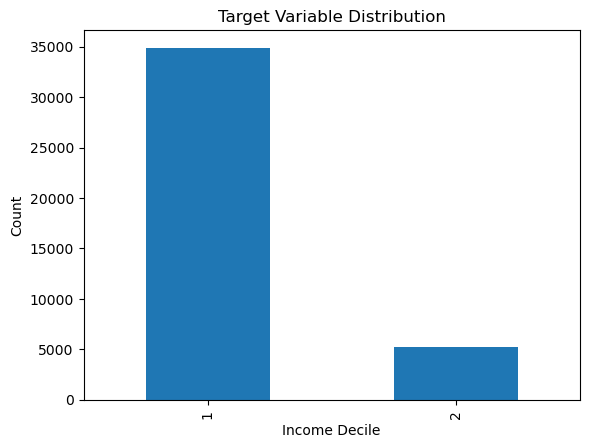

In [8]:
incexp_df['ELECTRIC'].value_counts().plot(kind='bar')
plt.title('Target Variable Distribution')
plt.xlabel('Income Decile')
plt.ylabel('Count')
plt.show()

The two categories (1 and 2) of ELECTRIC need to be equalized by either creating synthetic data for the lacking category (2) or by deleting rows from the ample category (1). The majority class was undersampled so that we can still use realworld data for training and to prevent overfitting from too many rows of features.

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Define categorical columns to exclude from standardization
categorical_columns = [
    # Text-based categorical
    "W_REGN", "URB", "SEX", "MS", 'W_OID', "JOB", "HHTYPE", "TENURE", "TOILET", "ELECTRIC", "WATER",
    # Numeric categorical 
    "OCCUP", "KB", "CW", "AGELESS5", "AGE5_17", "EMPLOYED_PAY", "EMPLOYED_PROF"
]

# Checking class distribution before balancing
print("Class distribution before balancing:")
print(incexp_df['ELECTRIC'].value_counts())

# Splitting features and target variable
X = incexp_df.drop('ELECTRIC', axis=1)  # Drop the target column
y = incexp_df['ELECTRIC']               # Target column

# Separate categorical and numerical columns
numerical_columns = [col for col in X.columns if col not in categorical_columns]

# Standardize only numerical columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Combine scaled features and target back into a single DataFrame
balanced_df = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Separate majority and minority classes
majority_class = balanced_df[balanced_df['ELECTRIC'] == 1]
minority_class = balanced_df[balanced_df['ELECTRIC'] == 2]

### OPTION 1: Undersample Majority Class ###
majority_undersampled = majority_class.sample(len(minority_class), random_state=42)
balanced_df = pd.concat([majority_undersampled, minority_class])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Update incexp_df with the balanced data
incexp_df = balanced_df

# Checking the new class distribution after balancing
print("\nClass distribution after balancing:")
print(incexp_df['ELECTRIC'].value_counts())

# Displaying a few rows of the updated DataFrame
print("\nSample of the balanced dataset:")
print(incexp_df.head())


Class distribution before balancing:
ELECTRIC
1    34886
2     5285
Name: count, dtype: int64

Class distribution after balancing:
ELECTRIC
1    5285
2    5285
Name: count, dtype: int64

Sample of the balanced dataset:
   W_REGN       W_OID    W_SHSN     W_HCN  URB      RSTR       PSU   BWEIGHT  \
0      13  7501120004  1.189398  1.922436    1  1.463552 -0.386650  0.871048   
1       2  1513033002  0.543651 -0.548448    2  1.012240 -1.398083 -1.137228   
2      11  2401016000 -0.102096 -0.419345    2 -0.441989 -0.403210 -0.409227   
3      12  4701001002  1.189398 -0.236450    1  0.510782  0.493164 -0.671391   
4       1  5503031001 -1.393590 -0.993135    2  0.611073 -0.513133  0.090228   

      RFACT     FSIZE  ...  OVEN_QTY  MOTOR_BANCA_QTY  MOTORCYCLE_QTY  \
0  0.235254  0.621521  ... -0.392104        -0.092333       -0.429018   
1 -1.143164 -1.730982  ... -0.392104        -0.092333       -0.429018   
2 -0.622976  0.386270  ... -0.392104        -0.092333       -0.429018   
3 -0.555

## Feature Importance


import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = incexp_df.drop(columns=['ELECTRIC'])  
y = incexp_df['ELECTRIC']

rf = RandomForestClassifier()
selector = RFE(rf, n_features_to_select=20, step=10)  # step=10 removes 10 features per iteration
selector.fit(X, y)

selected_features = X.columns[selector.support_]
print("Selected features:", selected_features)


In [10]:
selected_features = ['W_OID', 'RFACT', 'NET_RECEIPT', 'T_MEAT', 'T_HOUSING_WATER',
       'T_RENTVAL', 'T_COMMUNICATION', 'T_MISCELLANEOUS', 'T_NFOOD', 'T_TOTEX',
       'T_TOTDIS', 'T_TOREC', 'AGE', 'TOILET', 'WATER', 'DISTANCE', 'TV_QTY',
       'CD_QTY', 'REF_QTY', 'PCINC']

## Feature Analysis

## Investigating Correlation between Features
In this section, we will investigate which features have a high correlation with each other. This is to determine which features should be used or removed depending on the data analysis we want to apply.

Here we test the correlation of the features `WAGES`, `AGRI_SAL`, `CASH_ABROAD`.

In [11]:
correlations = {}
for feature in selected_features:
    correlations[feature] = incexp_df[[feature, 'ELECTRIC']].corr().iloc[0, 1]

# Convert the dictionary to a DataFrame for better visualization
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation_with_ELECTRIC'])

# Sort the correlations in descending order
correlation_df = correlation_df.sort_values(by='Correlation_with_ELECTRIC', ascending=False)

# Print the correlation with ELECTRIC
print(correlation_df)

            Feature  Correlation_with_ELECTRIC
14            WATER                   0.457738
2       NET_RECEIPT                   0.403798
13           TOILET                   0.339757
15         DISTANCE                   0.254283
0             W_OID                   0.075601
12              AGE                  -0.069055
1             RFACT                  -0.250159
18          REF_QTY                  -0.492465
5         T_RENTVAL                  -0.510239
3            T_MEAT                  -0.510784
7   T_MISCELLANEOUS                  -0.517994
19            PCINC                  -0.521591
6   T_COMMUNICATION                  -0.530665
11          T_TOREC                  -0.533231
9           T_TOTEX                  -0.537790
10         T_TOTDIS                  -0.541226
17           CD_QTY                  -0.576132
8           T_NFOOD                  -0.597985
4   T_HOUSING_WATER                  -0.615529
16           TV_QTY                  -0.718934


Nothing changed.

In [12]:
# List of features to include in the correlation test
features = ['W_OID', 'RFACT', 'NET_RECEIPT', 'TOINC', 'T_MEAT', 'T_SUGAR',
            'T_HOUSING_WATER', 'T_RENTVAL', 'T_COMMUNICATION', 'T_MISCELLANEOUS',
            'T_NFOOD', 'T_TOTEX', 'T_TOTDIS', 'T_TOREC', 'TOILET', 'WATER',
            'TV_QTY', 'CD_QTY', 'REF_QTY', 'PCINC']

# Selecting the features and computing the correlation matrix
correlation_test = incexp_df[features].corr()

# Display the correlation matrix
print(correlation_test)

                    W_OID     RFACT  NET_RECEIPT     TOINC    T_MEAT  \
W_OID            1.000000 -0.011728    -0.090742  0.013880 -0.084606   
RFACT           -0.011728  1.000000    -0.393852  0.202152  0.255113   
NET_RECEIPT     -0.090742 -0.393852     1.000000 -0.407995 -0.338289   
TOINC            0.013880  0.202152    -0.407995  1.000000  0.713962   
T_MEAT          -0.084606  0.255113    -0.338289  0.713962  1.000000   
T_SUGAR          0.027150 -0.006250    -0.045998  0.491408  0.381768   
T_HOUSING_WATER -0.002041  0.291659    -0.533577  0.820441  0.650223   
T_RENTVAL        0.021844  0.298307    -0.552028  0.714132  0.542203   
T_COMMUNICATION -0.011035  0.209018    -0.382546  0.709323  0.585511   
T_MISCELLANEOUS  0.006363  0.206952    -0.398729  0.823396  0.672110   
T_NFOOD         -0.001073  0.263148    -0.477323  0.912472  0.709165   
T_TOTEX          0.017100  0.233563    -0.428483  0.939491  0.743122   
T_TOTDIS         0.012653  0.225660    -0.420707  0.948775  0.73

T_TOREC, T_TOTDIS, and T_TOTEX are highly related to TOINC and due to that, they are dropped.

In [13]:
#Remaining Features
selected_features = ['WATER', 'NET_RECEIPT', 'TOILET', 'TV_QTY', 'T_HOUSING_WATER', 
            'CD_QTY', 'T_NFOOD', 'TOINC', 'PCINC', 'T_COMMUNICATION', 
            'T_MISCELLANEOUS', 'REF_QTY', 'W_OID', 'AGE', 'DISTANCE', 'T_MEAT', 'T_SUGAR', 'RFACT']


# Initial Model Training

## Logistic Regression

Seeing as this is a binary classification problem wherein the target variable is categorical, logistic regression is well suited for it. It is also easier to interpret with logistic regression as it provides probabilities for each class, which helps in understanding the confidence of predictions. Lastly, logistic regression is recommended as there is a linear relationship between the independent variables and the log-odds of the dependent variable.



## Naive Bayes

Naive Bayes was one of the chosen models as it's well known as a algorithm for classification through the use of probabilities. Gaussian Naive Bayes was used specifically due to the fact that the data we are using bears both continuous and categorical features, which the model can use to compute it's predictions.

## K-Nearest Neighbors Classifier (KNN)

We now use the KNN Classifier for prediciting whether the given household has electricity. KNN or K-Nearest Neighbors, is known to be the most naive kind of supervies machine learning, by only basing its prediction on the distance of the nearest data point/s.

We decided to use this since our task involves classification and KNN is easy to understand and implement, no need for complex training. However, we also want to test whether KNN works well in a big dataset, since most claims stated that it only works well with small to medium datasets.

## Support vector machines (SVM)

Support vector machines (SVMs) share the same strength as KNN, where it is able to account for non-linearly sepaerable classes by way of non-linear decision boundaries such as the RBF kernel (for higher-dimensional data) and the polynomial kernel. <reasons why svm good>

To give the initial model the best chance of accurately representing the data, the kernel RBF was used, since a non-linear decision boundary is likely when dealing with multiple features, with complex relationships. With RBF being the default in the constructor function of ths sckit-learn package, it can be said it is the most generally-appplicable kernel. Similarly, the c parameter (1.0) is also the default value in the constructor, and is generally considered to be a not-too-high (10 -100) and not-too-low (< 0.1) value, giving it a good starting point to begin generalizing.

## All Models and their Outputs

In [14]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target variable
X = incexp_df[selected_features]  # Using the selected features from RFE
y = incexp_df['ELECTRIC']

# Dictionary to store model names and their instances
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance'),
    "Support Vector Machine": SVC(kernel='rbf', C=1.0)  # Default RBF kernel
}

# K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through each model
for model_name, model in models.items():
    accuracies = []
    print(f"\nModel: {model_name}")
    
    # Perform K-Fold Cross-Validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        # Use iloc[] for row selection
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict using the model
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"Fold {fold} Accuracy: {accuracy * 100:.2f}%")
        
        # Print classification report
        print(f"Classification Report for {model_name} (Fold {fold}):")
        print(classification_report(y_test, y_pred, zero_division=1))
        
        # Generate and display confusion matrix
        #cm = confusion_matrix(y_test, y_pred)
        # plt.figure(figsize=(6, 5))
        #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        #plt.title(f'Confusion Matrix for {model_name} (Fold {fold})')
        #plt.xlabel('Predicted')
        #plt.ylabel('Actual')
        #plt.show()

    # Average accuracy over all folds
    avg_accuracy = np.mean(accuracies) * 100
    variance = np.var(accuracies) * 100  # Variance of accuracies
    print(f"Average Accuracy for {model_name}: {avg_accuracy:.2f}%")
    print(f"Variance of Accuracy for {model_name}: {variance:.4f}%")



Model: Logistic Regression
Fold 1 Accuracy: 49.48%
Classification Report for Logistic Regression (Fold 1):
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      1068
           2       0.49      1.00      0.66      1046

    accuracy                           0.49      2114
   macro avg       0.75      0.50      0.33      2114
weighted avg       0.75      0.49      0.33      2114

Fold 2 Accuracy: 49.57%
Classification Report for Logistic Regression (Fold 2):
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      1066
           2       0.50      1.00      0.66      1048

    accuracy                           0.50      2114
   macro avg       0.75      0.50      0.33      2114
weighted avg       0.75      0.50      0.33      2114

Fold 3 Accuracy: 51.42%
Classification Report for Logistic Regression (Fold 3):
              precision    recall  f1-score   support

           1       1.00

# Error Analysis

## Logistic Regression

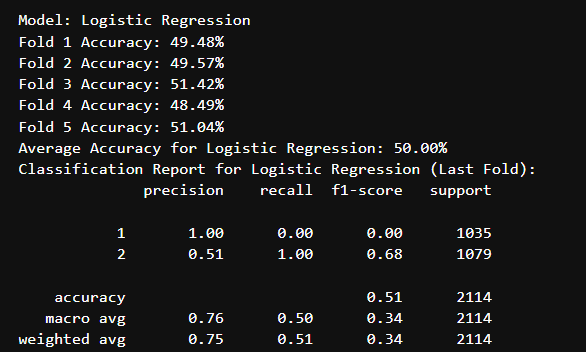

We can see that the precision of class 1 is 100% indicating that everything there is correctly classified true positives however this is not valid with it's recall being 0.00 meaning class 1 was never predicted in the first place. As for class 2, it has predicted true positives 51% of the time but the issue is that every instance has predicted it being class 2 and with there being 2 instances and an equalized model (50/50 distribution of both classes), that may be the reason why it has an average accuracy of 50%. The main challenge now is to make the model predict both of the two and not just one of them.

## Naive Bayes

In the reports, it seems to show that the Gaussian Naive Bayes model has the tendency to misclassify class 1 a little more compared to class 2, based on the precision of both classes and their recall, which class 1 has a precision of between 50-60%, but the recall is baring a result of less than 50%. While the predictions for class 2 is alot more accurate, having precision scores between 53-56%, and the recall being higher than 60%. This is showin that the model is predicting class 2 more compared to class 1.

## KNN Classifier

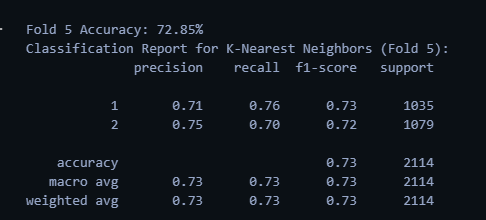

Here, we can see the last KNN fold results in an accuracy of 72.85%, a reasonable accuracy but not really a high performing one. This could still be improved.

Additionally we can see that precision, recall, and f-score of class 1 and 2 are balanced, having a line of 0.7, and the dataset is almost balanced with 1035 vs. 1079 instances.

Since class 1 has higher recall than precision, it catches most of the true positives of the category but also has some false positives. Vice versa, class 2 has a higher precision than recall, meaning that it is better at avoiding false positives but misses some true positives in its own class. We now try to improve the model performance of KNN.

# Support Vector Machines (SVM) 

Fold 1 accuracy: 56.48%
Fold 2 accuracy: 55.35%
Fold 3 accuracy: 54.78%
Fold 4 accuracy: 55.11%
Fold 5 accuracy: 53.97%

Average Accuracy for Support Vector Machine: 55.14%
Variance of Accuracy for Support Vector Machine: 0.0067%

An average accuracy of 55.14% is indicative of a model only slightly outperforming a coin flip. This shows that the model is underfitting, and unable to reflect the patterns found in the dataset. A low variance of 0.0067% across the accuracies suggests consistency between the performance across 5 folds. On average, the model's precision is 0.55, similar to the accuracy score. This near-50% value is a sign that a lot of misclassification is occuring between the classes. 

# Improving Model Performance

## Logistic Regression

The Optuna library was utilized to determine the optimal hyperparameters for the highest accuracy. Optuna uses a Bayesian optimization approach that optimizes itself based on past results. 

In Optuna the tuning process goes from: 
- Defining the Objective Function
- Creating a Study
- Running the Optimization
- Extracting the Best Hyperparameters

import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Define the objective function
def objective(trial):
    # Suggest hyperparameters to optimize
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet", "none"])
    C = trial.suggest_loguniform("C", 1e-4, 1e2)
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])
    l1_ratio = trial.suggest_uniform("l1_ratio", 0.0, 1.0) if penalty == "elasticnet" else None
    
    # Logistic Regression model with suggested hyperparameters
    model = LogisticRegression(
        penalty=penalty,
        C=C,
        solver=solver,
        l1_ratio=l1_ratio if penalty == "elasticnet" else None,
        max_iter=1000
    )

    # K-Fold Cross-Validation (K=5)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the model
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
        except Exception as e:
            return 0.0  # Return zero if training fails
    
    # Return the average accuracy over all folds
    avg_accuracy = np.mean(accuracies)
    return avg_accuracy


import optuna
from sklearn.linear_model import LogisticRegression

# Create a study and optimize the objective function
study = optuna.create_study(direction="maximize")

def objective(trial):
    # Suggest solver and penalty independently
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet", "none"])

    # Check for incompatible combinations and skip trial if invalid
    if solver == "liblinear" and penalty not in ["l1", "l2"]:
        raise optuna.TrialPruned()

    if solver == "saga" and penalty == "none":
        raise optuna.TrialPruned()

    # Use suggest_float with log=True for C
    C = trial.suggest_float("C", 1e-4, 1e2, log=True)

    # Use suggest_float instead of suggest_uniform for l1_ratio if using elasticnet
    l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0) if penalty == "elasticnet" else None

    # Handle the 'none' penalty correctly
    penalty = None if penalty == "none" else penalty

    # Create and train the model
    model = LogisticRegression(penalty=penalty, C=C, solver=solver, l1_ratio=l1_ratio, max_iter=1000)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)

    return accuracy

study.optimize(objective, n_trials=50)

# Print the best hyperparameters and score
print(f"\nBest trial: {study.best_trial.params}")
print(f"Best accuracy: {study.best_trial.value * 100:.2f}%")


From running the optimization, the accuracy is now ~ 90 %

In [15]:
best_params = {
    'solver': 'liblinear',
    'penalty': 'l1',
    'C': 2.1575802199275707
}


# Train the optimized Logistic Regression model
improved_log_model = LogisticRegression(
    solver=best_params['solver'],
    penalty=best_params['penalty'],
    C=best_params['C'],
    max_iter=1000  # Increase if convergence issues arise
)

The common hyperparameters that highly affect the Logistic Regression model is the solver being liblinear and the penalty being l1. The C value affects it as well although to a not so significant extent.

The solver being liblinear helped a ton due to it being designed for binary classification which is what the data is using (either with or without electricity). On the other hand, the l1 penalty introduces L1 regularization, which has the effect of shrinking less important feature coefficients to exactly zero.

## Naive Bayes


`GridSearchCV` was used to tune the Naive Bayes model. `GridSearchCV` systematically explores a range of hyperparameter values and evaluates the model's performance for each combination using cross-validation.

In [16]:
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [18]:
grid_model = GridSearchCV(estimator=GaussianNB(), param_grid = params_nb, verbose = 1, cv = 10, n_jobs=1)

In [19]:
accuracies = []

for train_index, test_index in kf.split(X):
   
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
  
    grid_model.fit(X_train, y_train)
    
   
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print(f"Average Accuracy: {np.mean(accuracies) * 100:.2f}%")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Average Accuracy: 55.40%


## KNN Classifier

KNN has different ways of improving the model. Most commonly is the hyperparameter tuning. We decided to tune both the hyperparameter k and the type of distance to be used by the model.

### Cross-validation for getting the Hyperparameter K

Since KNN highly relies on the hyperparamter K, we use the cross-validation to determine the best value for hyperparameter k.

We use the sklearn.model_selection.cross_val_score() to do this.

In [20]:
from sklearn.model_selection import cross_val_score

We add an array of possible values for the hyperparameter k. We'll add 10 arbitrary values.


In [21]:
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 45, 100]

Additionally, we instantiate an empty array to put the scores of each hyperparameter k has.

In [22]:
k_scores = np.zeros((len(k_choices), 5))

We combine the X_train, X_test, y_train, and y_test values to be used.

In [23]:
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

for i in range(len(k_choices)):
    print("k is : " + str(k_choices[i]))
    model = KNeighborsClassifier(k_choices[i])
    k_scores[i] = cross_val_score(model, X, y, cv=5)
    print(k_scores[i])
    pass

k is : 1
[0.70813623 0.71381268 0.71807001 0.70529801 0.71996216]
k is : 3
[0.743614   0.71712394 0.71854305 0.73226112 0.72280038]
k is : 5
[0.73368023 0.72800378 0.72894986 0.72894986 0.71759697]
k is : 8
[0.72705771 0.71239357 0.73509934 0.72705771 0.71239357]
k is : 10
[0.72421949 0.71381268 0.72942289 0.71475875 0.70577105]
k is : 12
[0.72090823 0.71523179 0.71948912 0.71192053 0.70813623]
k is : 15
[0.72280038 0.71996216 0.71996216 0.71617786 0.70482498]
k is : 20
[0.7256386  0.7076632  0.71428571 0.71239357 0.70340587]
k is : 45
[0.70482498 0.69347209 0.70340587 0.69631031 0.67975402]
k is : 100
[0.68448439 0.67360454 0.66177862 0.68211921 0.67502365]


In order to understand it better, we plot it using the matplotlib.pyplot and importing it as plt

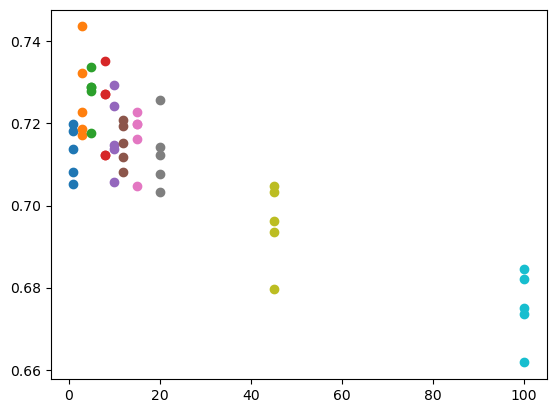

In [24]:
import matplotlib.pyplot as plt

def scatter_plot(scores):
    for i in range(len(scores)):
        x=[k_choices[i]] * 5
        plt.scatter(x, scores[i])

scatter_plot(k_scores)

In order to visualize it more properly, we calculate the mean and standard deviation of each scores from the folds of each hyperparameter k.

We use np.mean to get the average score per KNN model and np.std for getting the standard deviation.

In [25]:
avg_k_scores = np.mean(k_scores, axis=1)
print("Average of k_scores: ", avg_k_scores)

std_k_scores = np.std(k_scores, axis=1)
print("\nStandard Deviation of k_scores: ", std_k_scores)

Average of k_scores:  [0.71305582 0.7268685  0.72743614 0.72280038 0.71759697 0.71513718
 0.71674551 0.71267739 0.69555345 0.67540208]

Standard Deviation of k_scores:  [0.0056178  0.00990264 0.00530477 0.00899019 0.00831792 0.00472469
 0.00632102 0.00750684 0.00896826 0.00795715]


We now visualize this in a graph.

Text(0, 0.5, 'Cross-validation accuracy')

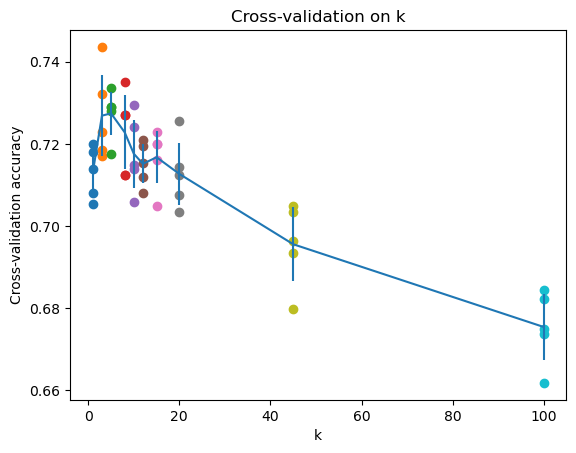

In [26]:
scatter_plot(k_scores)

plt.errorbar(k_choices, avg_k_scores, yerr=std_k_scores)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')

Here we can see that the accuracy peaks at the area with the orange dots. Basing this from the k_choices array, the hyperparamter k = 3 represents the orange dots, which means that setting the hyperparameter k to 3 results in a higher accuracy than the rest.

We now use 3 as our hyperparameter k in modeling our new KNN classifier.

In [27]:
knn_classifier = KNeighborsClassifier(3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

We first test it on the training data to determine the training accuracy.

In [28]:
y_predicted = knn_classifier.predict(X_train)
def compute_accuracy(predictions, actual):
    num_correct = (predictions == actual).sum()
    accuracy = num_correct / predictions.shape[0] * 100
    return accuracy
print("Training accuracy: ", compute_accuracy(y_train, y_predicted))
print("\nClassification report:\n ", classification_report(y_train, y_predicted))

Training accuracy:  83.20719016083254

Classification report:
                precision    recall  f1-score   support

           1       0.83      0.83      0.83      4250
           2       0.83      0.83      0.83      4206

    accuracy                           0.83      8456
   macro avg       0.83      0.83      0.83      8456
weighted avg       0.83      0.83      0.83      8456



We now test it on the testing data.

In [29]:
y_predicted = knn_classifier.predict(X_test)

print("Testing accuracy: ",  compute_accuracy(y_test, y_predicted))
print("\nClassification_report:\n", classification_report(y_test, y_predicted))

Testing accuracy:  72.32734153263955

Classification_report:
               precision    recall  f1-score   support

           1       0.72      0.72      0.72      1035
           2       0.73      0.72      0.73      1079

    accuracy                           0.72      2114
   macro avg       0.72      0.72      0.72      2114
weighted avg       0.72      0.72      0.72      2114



From the results, there wasn't that much of an improvement to the model by simply adjusting the hyperparameter k.

Now, why not we adjust the measuring distance used by the model with the same value for hyperparameter k.

## Testing other Distance Metrics

Since KNN classifier uses Euclidean distance as the default, we will explore other distance metrics such as Manhattan, Minkowski, and Cosine distance to see whether we can improve our KNN model more.

### Manhattan Distance

The Euclidean distance is ignored and instead is based on the absolute differences of their Cartesian coordinates.

In [30]:
knn_classifier = KNeighborsClassifier(n_neighbors= 3, metric= 'manhattan')

In [31]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

Test it on the training data first.

Next, testing it on the test data.

Here we can see that the accuracy for both training and testing has slightly improved by 3% (based on the testing accuracy) when using Manhattan distance.

### Minkowski Distance

Can be considered the generalization of Euclidean and Manhattan Distance.

In [32]:
knn_classifier = KNeighborsClassifier(n_neighbors= 3, metric= 'minkowski')

In [33]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

We first test it on the training dataset.

In [34]:
y_predicted = knn_classifier.predict(X_train)

print("Training accuracy: ", compute_accuracy(y_train, y_predicted))
print("\nClassification report:\n ", classification_report(y_train, y_predicted))

Training accuracy:  83.20719016083254

Classification report:
                precision    recall  f1-score   support

           1       0.83      0.83      0.83      4250
           2       0.83      0.83      0.83      4206

    accuracy                           0.83      8456
   macro avg       0.83      0.83      0.83      8456
weighted avg       0.83      0.83      0.83      8456



Next, the test dataset.

y_predicted = knn_classifier.predict(X_test)

print("Testing accuracy: ", compute_accuracy(y_test, y_predicted))
print("\nClassification report:\n ", classification_report(y_test, y_predicted))

Here, we can see using Minkowski distance does not improve the accuracy for both the training and testing. We now move on to the last one.

Cosine Distance

This measures the difference of two vectors by getting their cosine of the angle between them.

In [35]:
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric= 'cosine')

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=3)

In [36]:
y_predicted = knn_classifier.predict(X_train)

print("Training accuracy: ", compute_accuracy(y_train, y_predicted))
print("\nClassification report:\n ", classification_report(y_train, y_predicted))

Training accuracy:  50.30747398297068

Classification report:
                precision    recall  f1-score   support

           1       0.71      0.02      0.04      4250
           2       0.50      0.99      0.67      4206

    accuracy                           0.50      8456
   macro avg       0.60      0.51      0.35      8456
weighted avg       0.60      0.50      0.35      8456



Just from the training accuracy, we can already tell that Cosine distance does not improve our model, instead it worsens the model.

### Final Hyperparameters

From the cross-validation and testing on different metrics, we conclude that the hyperparameter k = 3 using the Manhattan distance provides an increase in the original KNN model. While it may not be big, this proves that further tuning of hyperparameters helps improve the model.

We will now finalize the knn_classifier variable with the said hyperparameters.

In [37]:
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

# SVM

Tuning the hyperparameters of an SVM model involve the following: 

<ol>
<li> its regularization parameter C, </li>
<li> the kernel type (either linear, poly, rbf, sigmoid) or the shape of the divider between two classes,  </li>
<li> its degree (only used by polynomial kernel) </li>
<li>and its gamma, the kernel coefficient for the kernels rbf, poly, and sigmoid.</li>
    <p> gamma=scale, the gamma is  1 / (n_features * X.var()) </p>
    <p> gamma= auto, the gamma is 1/n_features </p>
</ol>

The process below involves iterating through each configuration of C, Kernel, and gamma to see which model performs best.
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Define X and y
X = incexp_df[selected_features]  # Using the selected features from RFE
y = incexp_df['ELECTRIC']

# Define SVM model
svm_model = SVC()

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],                    # Regularization strength
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto']                 # Kernel coefficient
}

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracies and detailed results
accuracies = []
results_list = []

# Perform K-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    print(f"\n====================== Starting Fold {fold} ======================")

    # Split data into training and testing sets (without scaling)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(svm_model, param_grid, cv=3, n_jobs=-1, verbose=1)
    print(f"\n⚡️ Starting Grid Search for Fold {fold}...")

    # Fit grid search on raw data (no scaling)
    grid_search.fit(X_train, y_train)

    # Best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    print(f"\n✅ Best Parameters for Fold {fold}: {best_params}")

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate and store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Print fold accuracy
    print(f"📊 Fold {fold} Accuracy: {accuracy * 100:.2f}%")

    # Print classification report for each fold
    class_report = classification_report(y_test, y_pred, zero_division=1)
    print(f"📝 Classification Report for SVM (Fold {fold}):")
    print(class_report)

    # Save results for this fold
    fold_results = {
        'Fold': fold,
        'Best Params': best_params,
        'Accuracy': accuracy * 100,
        'Classification Report': class_report
    }
    results_list.append(fold_results)

# Calculate average accuracy and variance
avg_accuracy = np.mean(accuracies) * 100
variance = np.var(accuracies) * 100
print(f"\n🎯 Average Accuracy for SVM: {avg_accuracy:.2f}%")
print(f"📉 Variance of Accuracy for SVM: {variance:.4f}%")

# Save results to a DataFrame and CSV for comparison
results_df = pd.DataFrame(results_list)
results_df.to_csv('svm_cv_results.csv', index=False)
print("\n💾 Results saved to 'svm_cv_results.csv' for future analysis!")



====================== Starting Fold 1 ======================

⚡️ Starting Grid Search for Fold 1...
Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Define best configurations for each fold
fold_params = [
    {"C": 1, "gamma": "scale", "kernel": "rbf"},  # Fold 1
    {"C": 1, "gamma": "scale", "kernel": "rbf"},  # Fold 2
    {"C": 10, "gamma": "scale", "kernel": "rbf"},  # Fold 3
    {"C": 10, "gamma": "scale", "kernel": "rbf"},  # Fold 4
    {"C": 1, "gamma": "scale", "kernel": "rbf"},  # Fold 5
]

# Define and train models for each fold
models = []
for i, params in enumerate(fold_params, 1):
    model = SVC(C=params["C"], kernel=params["kernel"], gamma=params["gamma"])
    model.fit(X_pca, y)  
    models.append(model)
    print(f"Model for Fold {i} trained with params: {params}")


Model for Fold 1 trained with params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Model for Fold 2 trained with params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Model for Fold 3 trained with params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Model for Fold 4 trained with params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Model for Fold 5 trained with params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


# Models after hyperparameter tuning


Model: Logistic Regression
Fold 1 Accuracy: 90.02%
Classification Report for Logistic Regression (Fold 1):
              precision    recall  f1-score   support

           1       0.94      0.85      0.89      1049
           2       0.87      0.95      0.91      1065

    accuracy                           0.90      2114
   macro avg       0.90      0.90      0.90      2114
weighted avg       0.90      0.90      0.90      2114



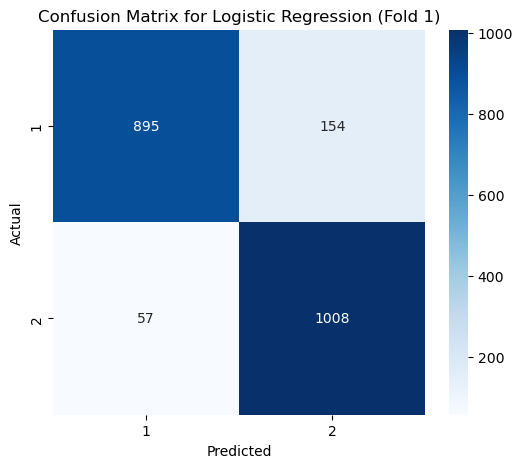

Fold 2 Accuracy: 91.44%
Classification Report for Logistic Regression (Fold 2):
              precision    recall  f1-score   support

           1       0.96      0.86      0.91      1042
           2       0.88      0.97      0.92      1072

    accuracy                           0.91      2114
   macro avg       0.92      0.91      0.91      2114
weighted avg       0.92      0.91      0.91      2114



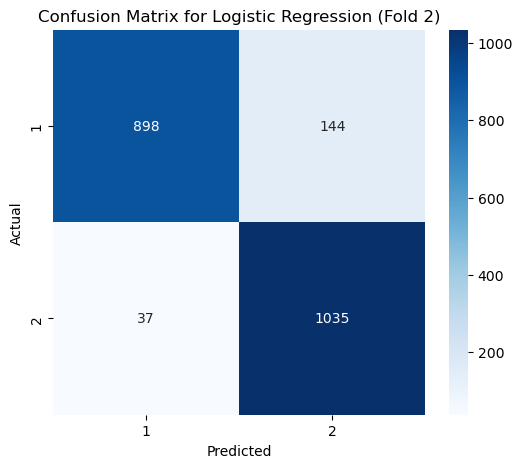

Fold 3 Accuracy: 90.87%
Classification Report for Logistic Regression (Fold 3):
              precision    recall  f1-score   support

           1       0.94      0.87      0.90      1056
           2       0.88      0.95      0.91      1058

    accuracy                           0.91      2114
   macro avg       0.91      0.91      0.91      2114
weighted avg       0.91      0.91      0.91      2114



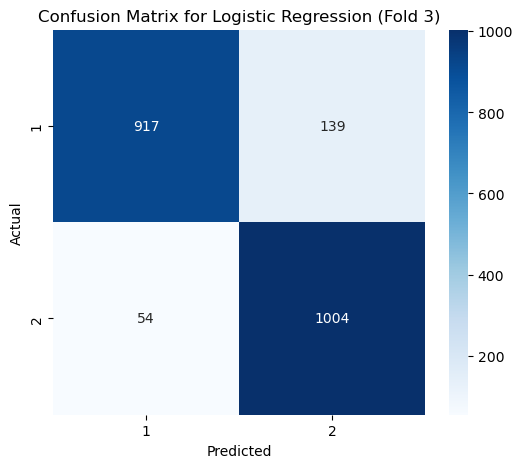

Fold 4 Accuracy: 90.68%
Classification Report for Logistic Regression (Fold 4):
              precision    recall  f1-score   support

           1       0.94      0.87      0.90      1057
           2       0.88      0.94      0.91      1057

    accuracy                           0.91      2114
   macro avg       0.91      0.91      0.91      2114
weighted avg       0.91      0.91      0.91      2114



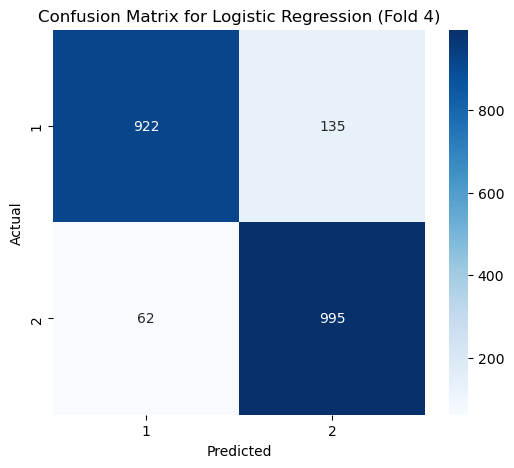

Fold 5 Accuracy: 89.69%
Classification Report for Logistic Regression (Fold 5):
              precision    recall  f1-score   support

           1       0.95      0.84      0.89      1081
           2       0.85      0.95      0.90      1033

    accuracy                           0.90      2114
   macro avg       0.90      0.90      0.90      2114
weighted avg       0.90      0.90      0.90      2114



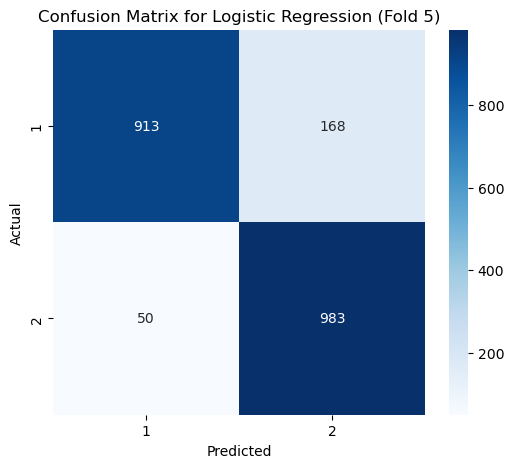

Average Accuracy for Logistic Regression: 90.54%

Model: Naive Bayes
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 1 Accuracy: 56.43%
Classification Report for Naive Bayes (Fold 1):
              precision    recall  f1-score   support

           1       0.57      0.48      0.52      1049
           2       0.56      0.64      0.60      1065

    accuracy                           0.56      2114
   macro avg       0.57      0.56      0.56      2114
weighted avg       0.57      0.56      0.56      2114



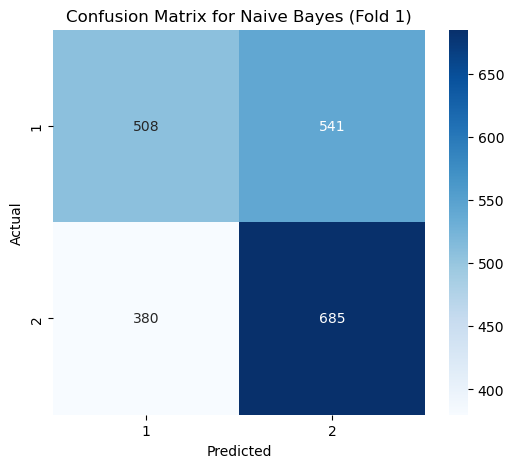

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 2 Accuracy: 54.64%
Classification Report for Naive Bayes (Fold 2):
              precision    recall  f1-score   support

           1       0.55      0.45      0.50      1042
           2       0.55      0.64      0.59      1072

    accuracy                           0.55      2114
   macro avg       0.55      0.55      0.54      2114
weighted avg       0.55      0.55      0.54      2114



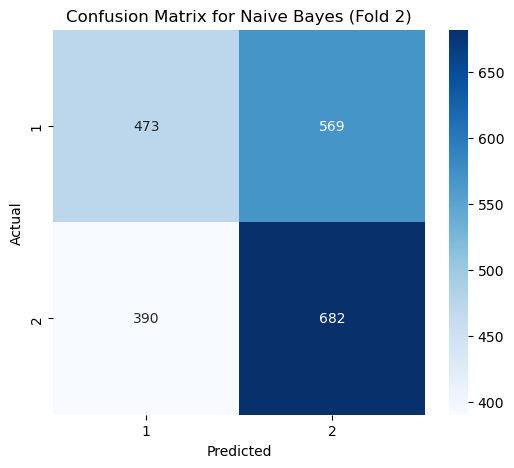

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 3 Accuracy: 57.05%
Classification Report for Naive Bayes (Fold 3):
              precision    recall  f1-score   support

           1       0.59      0.45      0.51      1056
           2       0.56      0.69      0.62      1058

    accuracy                           0.57      2114
   macro avg       0.57      0.57      0.56      2114
weighted avg       0.57      0.57      0.56      2114



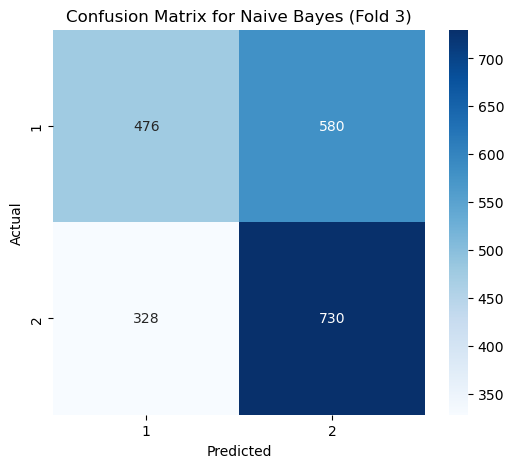

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 4 Accuracy: 56.72%
Classification Report for Naive Bayes (Fold 4):
              precision    recall  f1-score   support

           1       0.59      0.46      0.52      1057
           2       0.56      0.67      0.61      1057

    accuracy                           0.57      2114
   macro avg       0.57      0.57      0.56      2114
weighted avg       0.57      0.57      0.56      2114



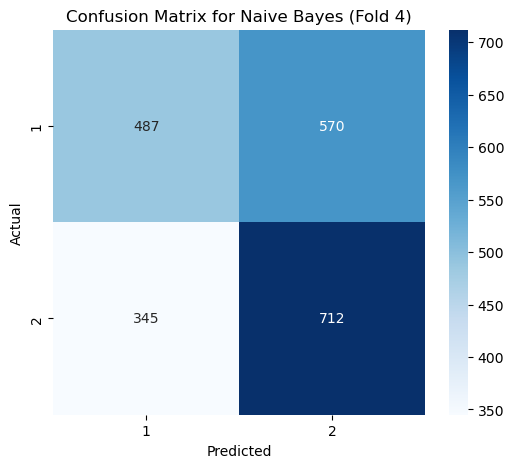

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 5 Accuracy: 54.68%
Classification Report for Naive Bayes (Fold 5):
              precision    recall  f1-score   support

           1       0.58      0.40      0.48      1081
           2       0.53      0.70      0.60      1033

    accuracy                           0.55      2114
   macro avg       0.55      0.55      0.54      2114
weighted avg       0.56      0.55      0.54      2114



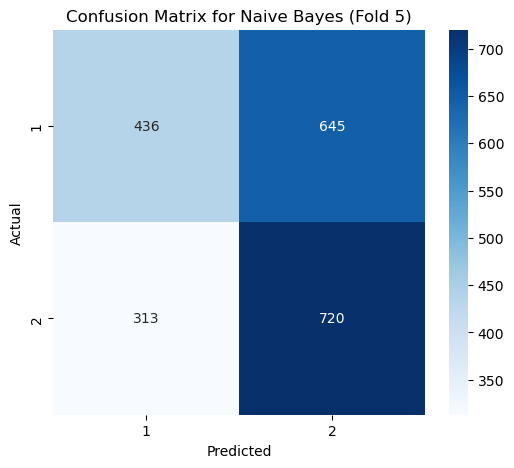

Average Accuracy for Naive Bayes: 55.90%

Model: K-Nearest Neighbors
Fold 1 Accuracy: 76.54%
Classification Report for K-Nearest Neighbors (Fold 1):
              precision    recall  f1-score   support

           1       0.77      0.75      0.76      1049
           2       0.76      0.78      0.77      1065

    accuracy                           0.77      2114
   macro avg       0.77      0.77      0.77      2114
weighted avg       0.77      0.77      0.77      2114



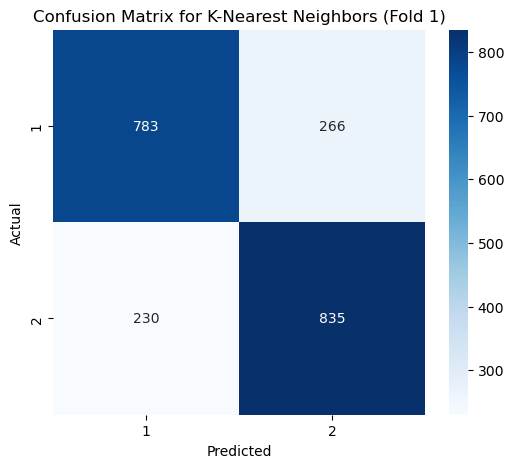

Fold 2 Accuracy: 76.25%
Classification Report for K-Nearest Neighbors (Fold 2):
              precision    recall  f1-score   support

           1       0.76      0.75      0.76      1042
           2       0.76      0.77      0.77      1072

    accuracy                           0.76      2114
   macro avg       0.76      0.76      0.76      2114
weighted avg       0.76      0.76      0.76      2114



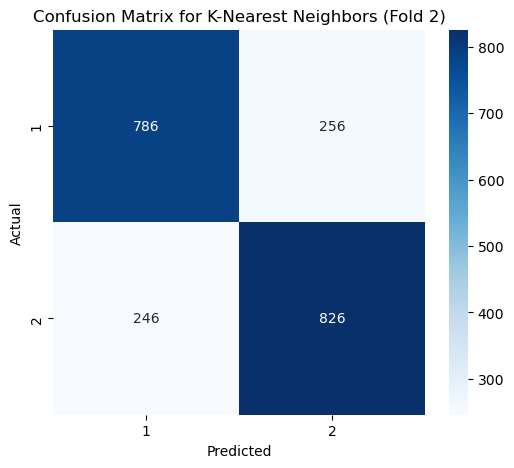

Fold 3 Accuracy: 76.11%
Classification Report for K-Nearest Neighbors (Fold 3):
              precision    recall  f1-score   support

           1       0.77      0.75      0.76      1056
           2       0.75      0.78      0.76      1058

    accuracy                           0.76      2114
   macro avg       0.76      0.76      0.76      2114
weighted avg       0.76      0.76      0.76      2114



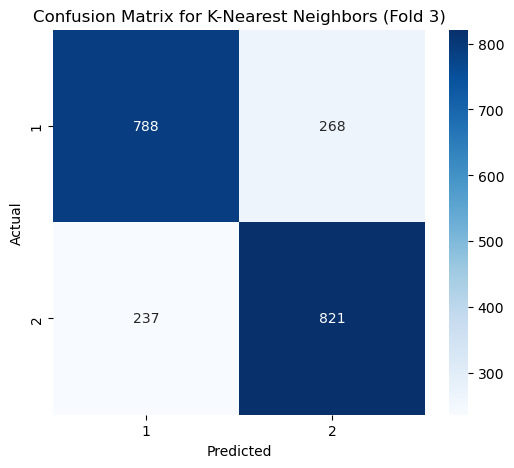

Fold 4 Accuracy: 75.35%
Classification Report for K-Nearest Neighbors (Fold 4):
              precision    recall  f1-score   support

           1       0.75      0.77      0.76      1057
           2       0.76      0.74      0.75      1057

    accuracy                           0.75      2114
   macro avg       0.75      0.75      0.75      2114
weighted avg       0.75      0.75      0.75      2114



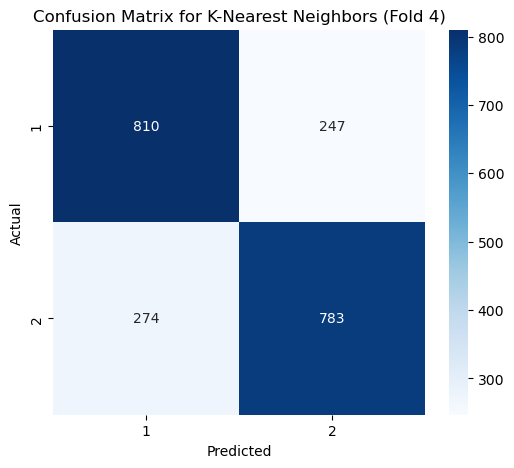

Fold 5 Accuracy: 74.93%
Classification Report for K-Nearest Neighbors (Fold 5):
              precision    recall  f1-score   support

           1       0.77      0.73      0.75      1081
           2       0.73      0.77      0.75      1033

    accuracy                           0.75      2114
   macro avg       0.75      0.75      0.75      2114
weighted avg       0.75      0.75      0.75      2114



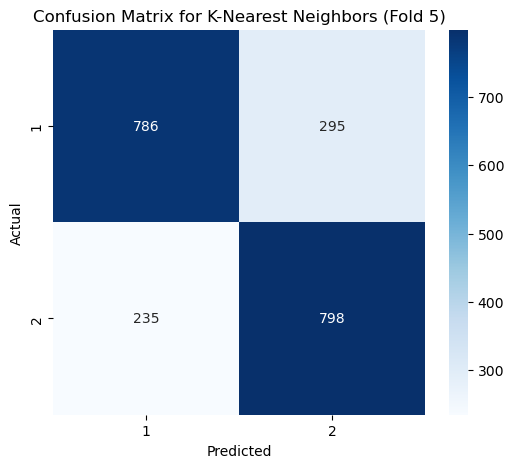

Average Accuracy for K-Nearest Neighbors: 75.84%


In [ ]:
models = {
    "Logistic Regression": improved_log_model,
    "Naive Bayes": grid_model,
    "K-Nearest Neighbors": knn_classifier
}

# K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through each model
for model_name, model in models.items():
    accuracies = []
    print(f"\nModel: {model_name}")
    
    # Perform K-Fold Cross-Validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        # Use indexing for NumPy arrays
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict using the model
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"Fold {fold} Accuracy: {accuracy * 100:.2f}%")
        
        # Print classification report
        print(f"Classification Report for {model_name} (Fold {fold}):")
        print(classification_report(y_test, y_pred, zero_division=1))
        
        # Generate and display confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.title(f'Confusion Matrix for {model_name} (Fold {fold})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    # Average accuracy over all folds
    avg_accuracy = np.mean(accuracies) * 100
    print(f"Average Accuracy for {model_name}: {avg_accuracy:.2f}%")



Model: Logistic Regression
Fold 1 Accuracy: 90.02%
Classification Report for Logistic Regression (Fold 1):
              precision    recall  f1-score   support

           1       0.94      0.85      0.89      1049
           2       0.87      0.95      0.91      1065

    accuracy                           0.90      2114
   macro avg       0.90      0.90      0.90      2114
weighted avg       0.90      0.90      0.90      2114



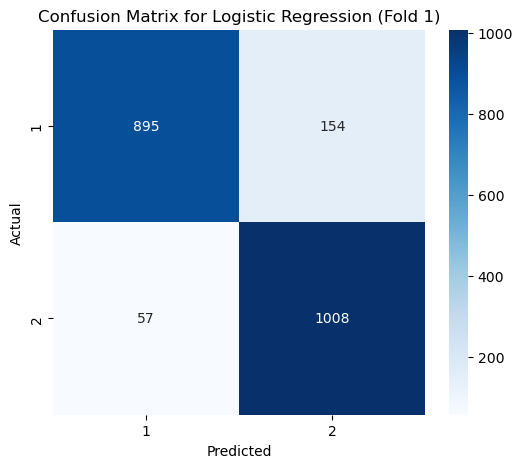

Fold 2 Accuracy: 91.44%
Classification Report for Logistic Regression (Fold 2):
              precision    recall  f1-score   support

           1       0.96      0.86      0.91      1042
           2       0.88      0.97      0.92      1072

    accuracy                           0.91      2114
   macro avg       0.92      0.91      0.91      2114
weighted avg       0.92      0.91      0.91      2114



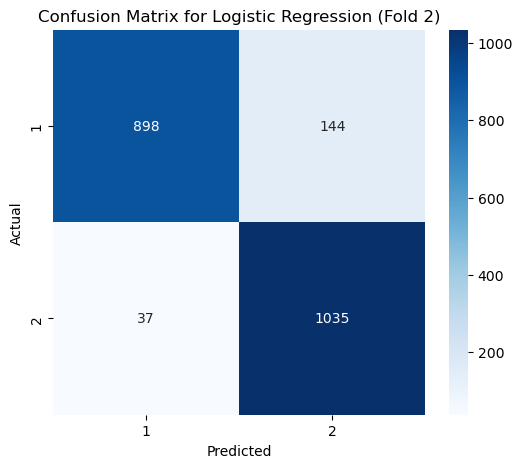

Fold 3 Accuracy: 90.87%
Classification Report for Logistic Regression (Fold 3):
              precision    recall  f1-score   support

           1       0.94      0.87      0.90      1056
           2       0.88      0.95      0.91      1058

    accuracy                           0.91      2114
   macro avg       0.91      0.91      0.91      2114
weighted avg       0.91      0.91      0.91      2114



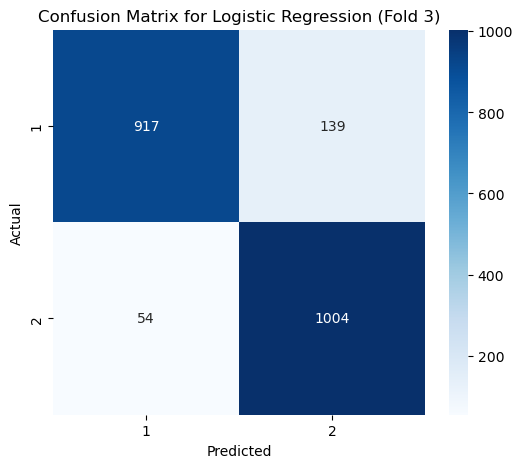

Fold 4 Accuracy: 90.68%
Classification Report for Logistic Regression (Fold 4):
              precision    recall  f1-score   support

           1       0.94      0.87      0.90      1057
           2       0.88      0.94      0.91      1057

    accuracy                           0.91      2114
   macro avg       0.91      0.91      0.91      2114
weighted avg       0.91      0.91      0.91      2114



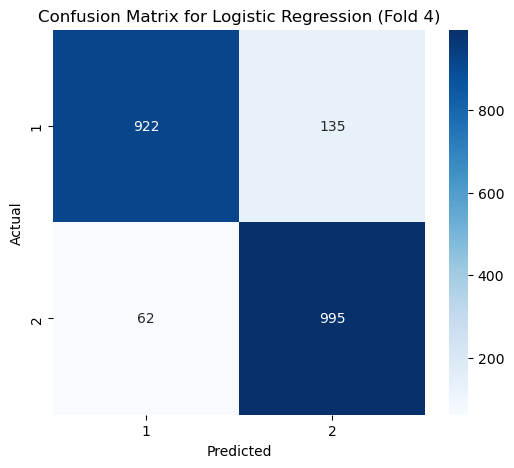

Fold 5 Accuracy: 89.69%
Classification Report for Logistic Regression (Fold 5):
              precision    recall  f1-score   support

           1       0.95      0.84      0.89      1081
           2       0.85      0.95      0.90      1033

    accuracy                           0.90      2114
   macro avg       0.90      0.90      0.90      2114
weighted avg       0.90      0.90      0.90      2114



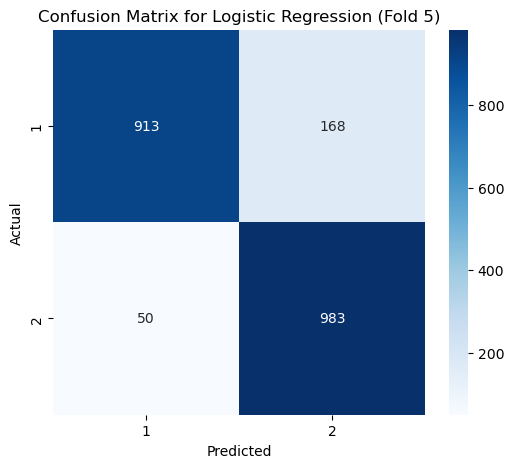

Average Accuracy for Logistic Regression: 90.54%

Model: Naive Bayes
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 1 Accuracy: 56.43%
Classification Report for Naive Bayes (Fold 1):
              precision    recall  f1-score   support

           1       0.57      0.48      0.52      1049
           2       0.56      0.64      0.60      1065

    accuracy                           0.56      2114
   macro avg       0.57      0.56      0.56      2114
weighted avg       0.57      0.56      0.56      2114



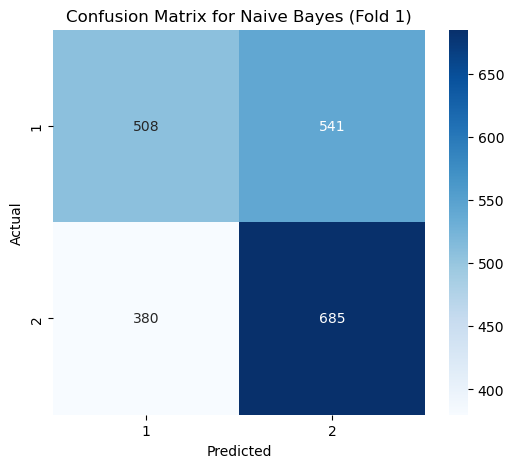

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 2 Accuracy: 54.64%
Classification Report for Naive Bayes (Fold 2):
              precision    recall  f1-score   support

           1       0.55      0.45      0.50      1042
           2       0.55      0.64      0.59      1072

    accuracy                           0.55      2114
   macro avg       0.55      0.55      0.54      2114
weighted avg       0.55      0.55      0.54      2114



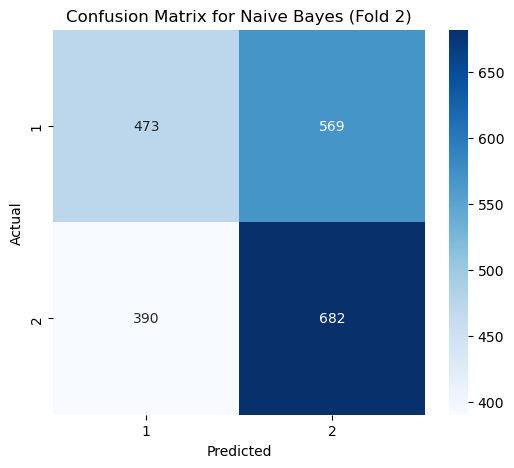

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 3 Accuracy: 57.05%
Classification Report for Naive Bayes (Fold 3):
              precision    recall  f1-score   support

           1       0.59      0.45      0.51      1056
           2       0.56      0.69      0.62      1058

    accuracy                           0.57      2114
   macro avg       0.57      0.57      0.56      2114
weighted avg       0.57      0.57      0.56      2114



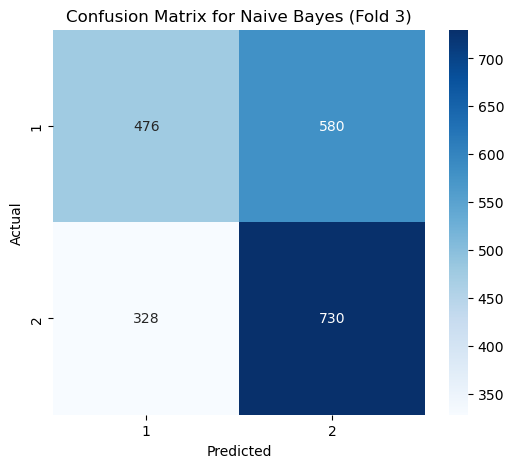

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 4 Accuracy: 56.72%
Classification Report for Naive Bayes (Fold 4):
              precision    recall  f1-score   support

           1       0.59      0.46      0.52      1057
           2       0.56      0.67      0.61      1057

    accuracy                           0.57      2114
   macro avg       0.57      0.57      0.56      2114
weighted avg       0.57      0.57      0.56      2114



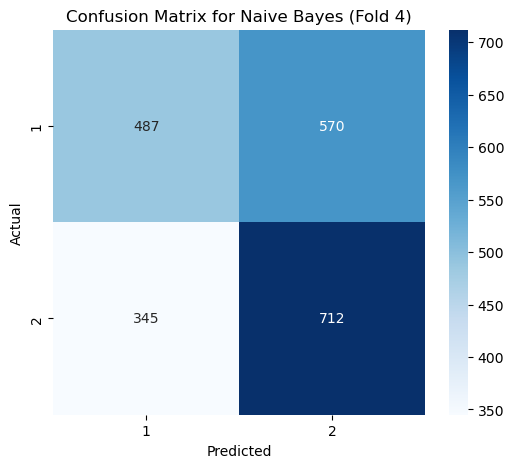

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 5 Accuracy: 54.68%
Classification Report for Naive Bayes (Fold 5):
              precision    recall  f1-score   support

           1       0.58      0.40      0.48      1081
           2       0.53      0.70      0.60      1033

    accuracy                           0.55      2114
   macro avg       0.55      0.55      0.54      2114
weighted avg       0.56      0.55      0.54      2114



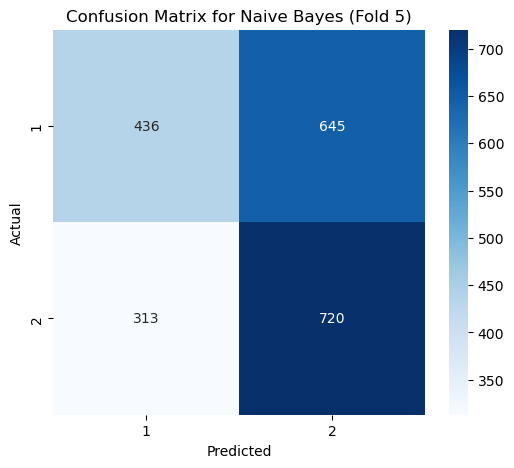

Average Accuracy for Naive Bayes: 55.90%

Model: K-Nearest Neighbors
Fold 1 Accuracy: 76.54%
Classification Report for K-Nearest Neighbors (Fold 1):
              precision    recall  f1-score   support

           1       0.77      0.75      0.76      1049
           2       0.76      0.78      0.77      1065

    accuracy                           0.77      2114
   macro avg       0.77      0.77      0.77      2114
weighted avg       0.77      0.77      0.77      2114



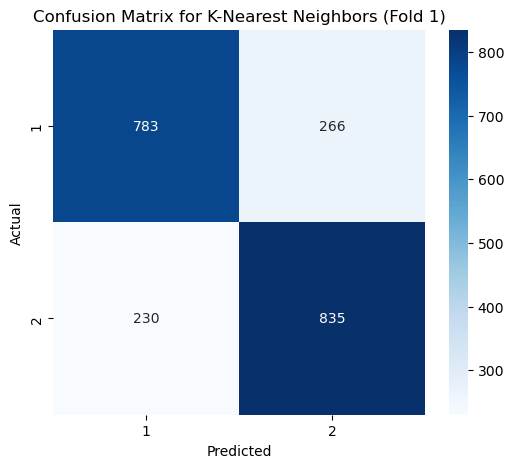

Fold 2 Accuracy: 76.25%
Classification Report for K-Nearest Neighbors (Fold 2):
              precision    recall  f1-score   support

           1       0.76      0.75      0.76      1042
           2       0.76      0.77      0.77      1072

    accuracy                           0.76      2114
   macro avg       0.76      0.76      0.76      2114
weighted avg       0.76      0.76      0.76      2114



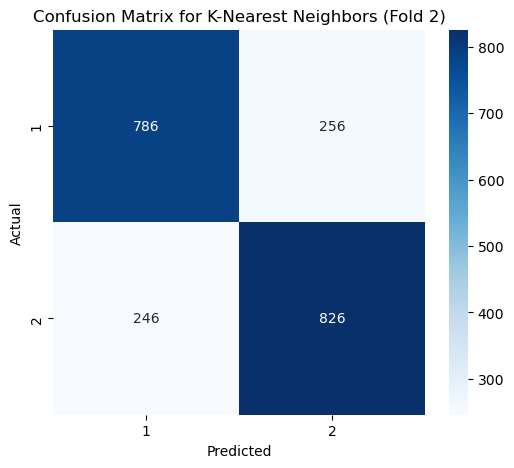

Fold 3 Accuracy: 76.11%
Classification Report for K-Nearest Neighbors (Fold 3):
              precision    recall  f1-score   support

           1       0.77      0.75      0.76      1056
           2       0.75      0.78      0.76      1058

    accuracy                           0.76      2114
   macro avg       0.76      0.76      0.76      2114
weighted avg       0.76      0.76      0.76      2114



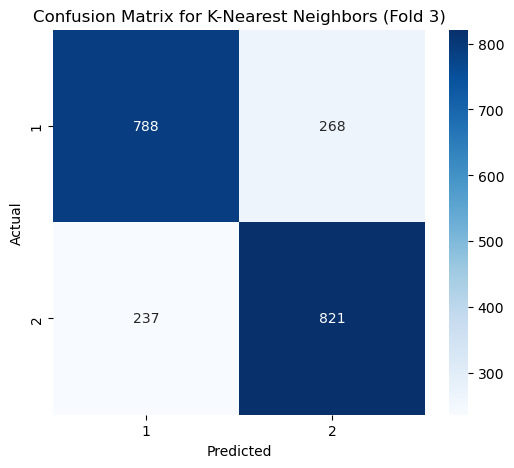

Fold 4 Accuracy: 75.35%
Classification Report for K-Nearest Neighbors (Fold 4):
              precision    recall  f1-score   support

           1       0.75      0.77      0.76      1057
           2       0.76      0.74      0.75      1057

    accuracy                           0.75      2114
   macro avg       0.75      0.75      0.75      2114
weighted avg       0.75      0.75      0.75      2114



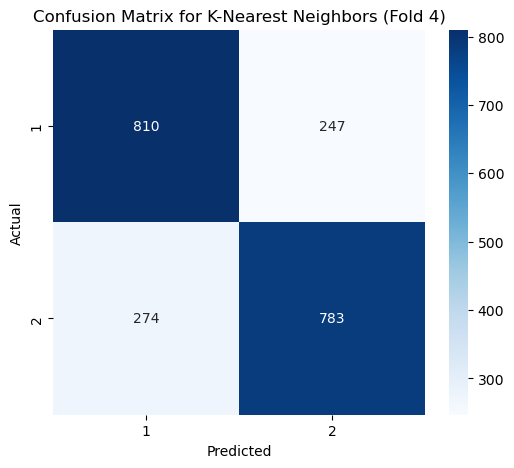

Fold 5 Accuracy: 74.93%
Classification Report for K-Nearest Neighbors (Fold 5):
              precision    recall  f1-score   support

           1       0.77      0.73      0.75      1081
           2       0.73      0.77      0.75      1033

    accuracy                           0.75      2114
   macro avg       0.75      0.75      0.75      2114
weighted avg       0.75      0.75      0.75      2114



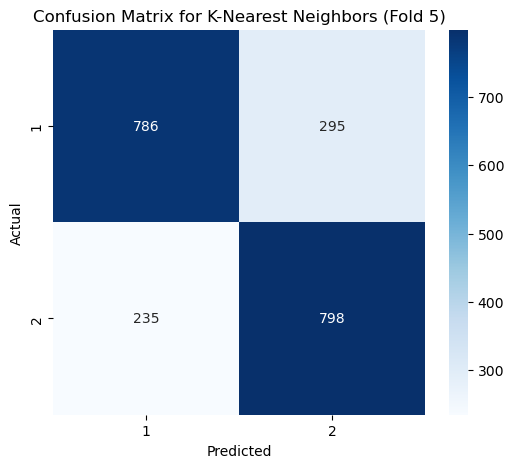

Average Accuracy for K-Nearest Neighbors: 75.84%


In [ ]:
models = {
    "Logistic Regression": improved_log_model,
    "Naive Bayes": grid_model,
    "K-Nearest Neighbors": knn_classifier
}

# K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through each model
for model_name, model in models.items():
    accuracies = []
    print(f"\nModel: {model_name}")
    
    # Perform K-Fold Cross-Validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        # Use indexing for NumPy arrays
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict using the model
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"Fold {fold} Accuracy: {accuracy * 100:.2f}%")
        
        # Print classification report
        print(f"Classification Report for {model_name} (Fold {fold}):")
        print(classification_report(y_test, y_pred, zero_division=1))
        
        # Generate and display confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.title(f'Confusion Matrix for {model_name} (Fold {fold})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    # Average accuracy over all folds
    avg_accuracy = np.mean(accuracies) * 100
    print(f"Average Accuracy for {model_name}: {avg_accuracy:.2f}%")


# Model Performance Summary

Here, we display the new Permance Summary of the improved machine learning models. We used the same technique as earlier where we generate iterations of the same model over and over again. 


Model: Logistic Regression
Fold 1 Accuracy: 90.07%
Classification Report for Logistic Regression (Fold 1):
              precision    recall  f1-score   support

           1       0.94      0.85      0.90      1049
           2       0.87      0.95      0.91      1065

    accuracy                           0.90      2114
   macro avg       0.90      0.90      0.90      2114
weighted avg       0.90      0.90      0.90      2114



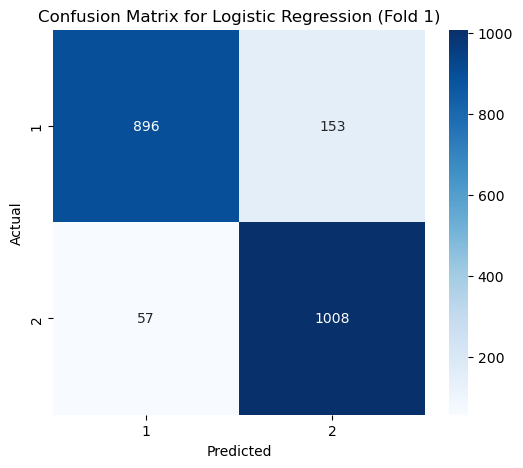

Fold 2 Accuracy: 91.44%
Classification Report for Logistic Regression (Fold 2):
              precision    recall  f1-score   support

           1       0.96      0.86      0.91      1042
           2       0.88      0.97      0.92      1072

    accuracy                           0.91      2114
   macro avg       0.92      0.91      0.91      2114
weighted avg       0.92      0.91      0.91      2114



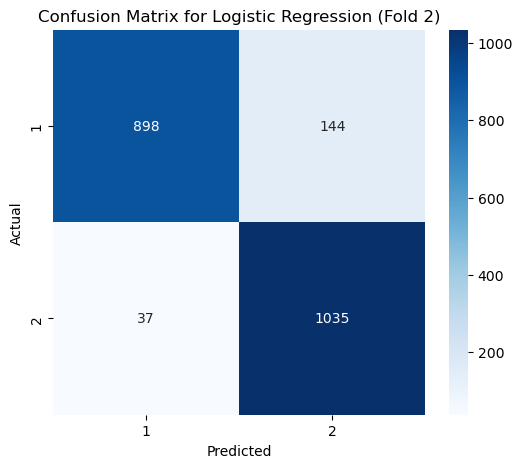

Fold 3 Accuracy: 90.87%
Classification Report for Logistic Regression (Fold 3):
              precision    recall  f1-score   support

           1       0.94      0.87      0.90      1056
           2       0.88      0.95      0.91      1058

    accuracy                           0.91      2114
   macro avg       0.91      0.91      0.91      2114
weighted avg       0.91      0.91      0.91      2114



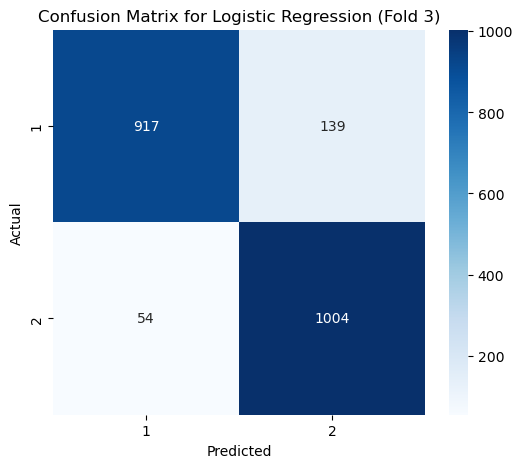

Fold 4 Accuracy: 90.68%
Classification Report for Logistic Regression (Fold 4):
              precision    recall  f1-score   support

           1       0.94      0.87      0.90      1057
           2       0.88      0.94      0.91      1057

    accuracy                           0.91      2114
   macro avg       0.91      0.91      0.91      2114
weighted avg       0.91      0.91      0.91      2114



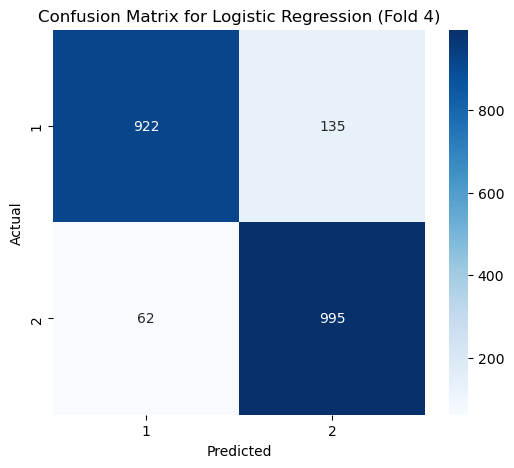

Fold 5 Accuracy: 89.69%
Classification Report for Logistic Regression (Fold 5):
              precision    recall  f1-score   support

           1       0.95      0.84      0.89      1081
           2       0.85      0.95      0.90      1033

    accuracy                           0.90      2114
   macro avg       0.90      0.90      0.90      2114
weighted avg       0.90      0.90      0.90      2114



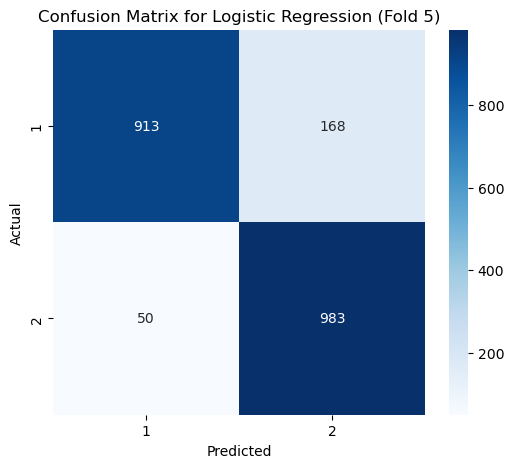

Average Accuracy for Logistic Regression: 90.55%

Model: Naive Bayes
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 1 Accuracy: 56.43%
Classification Report for Naive Bayes (Fold 1):
              precision    recall  f1-score   support

           1       0.57      0.48      0.52      1049
           2       0.56      0.64      0.60      1065

    accuracy                           0.56      2114
   macro avg       0.57      0.56      0.56      2114
weighted avg       0.57      0.56      0.56      2114



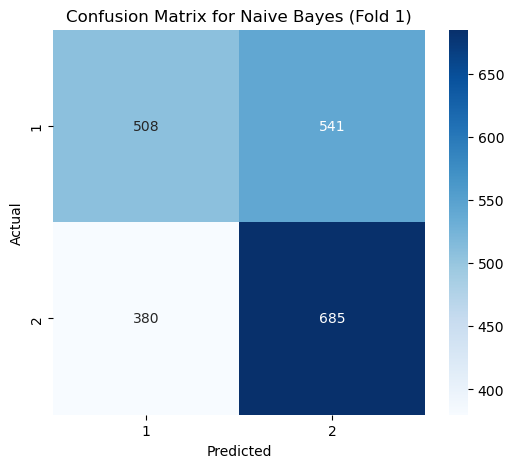

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 2 Accuracy: 54.64%
Classification Report for Naive Bayes (Fold 2):
              precision    recall  f1-score   support

           1       0.55      0.45      0.50      1042
           2       0.55      0.64      0.59      1072

    accuracy                           0.55      2114
   macro avg       0.55      0.55      0.54      2114
weighted avg       0.55      0.55      0.54      2114



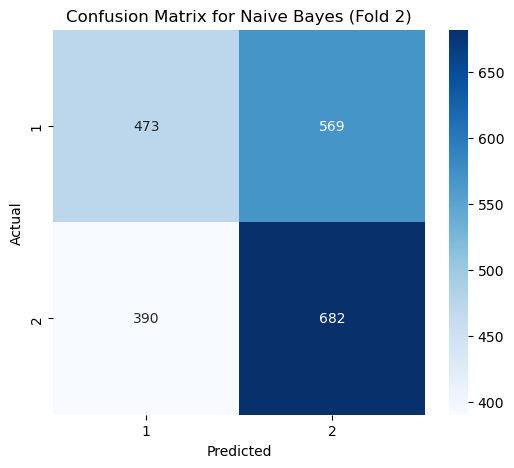

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 3 Accuracy: 57.05%
Classification Report for Naive Bayes (Fold 3):
              precision    recall  f1-score   support

           1       0.59      0.45      0.51      1056
           2       0.56      0.69      0.62      1058

    accuracy                           0.57      2114
   macro avg       0.57      0.57      0.56      2114
weighted avg       0.57      0.57      0.56      2114



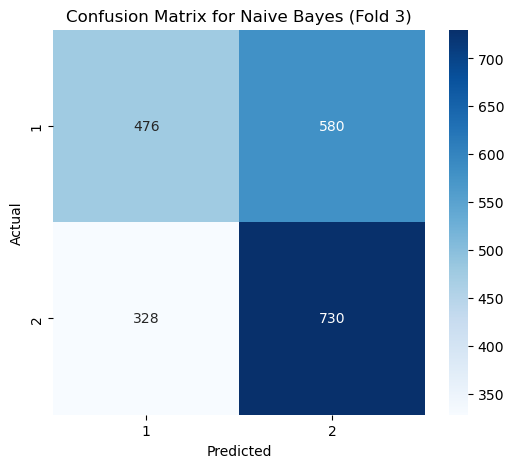

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 4 Accuracy: 56.72%
Classification Report for Naive Bayes (Fold 4):
              precision    recall  f1-score   support

           1       0.59      0.46      0.52      1057
           2       0.56      0.67      0.61      1057

    accuracy                           0.57      2114
   macro avg       0.57      0.57      0.56      2114
weighted avg       0.57      0.57      0.56      2114



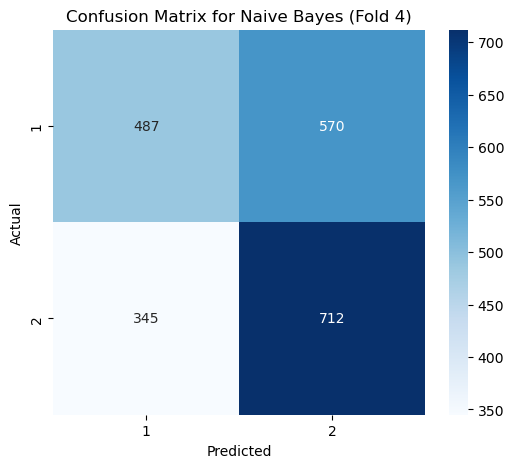

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fold 5 Accuracy: 54.68%
Classification Report for Naive Bayes (Fold 5):
              precision    recall  f1-score   support

           1       0.58      0.40      0.48      1081
           2       0.53      0.70      0.60      1033

    accuracy                           0.55      2114
   macro avg       0.55      0.55      0.54      2114
weighted avg       0.56      0.55      0.54      2114



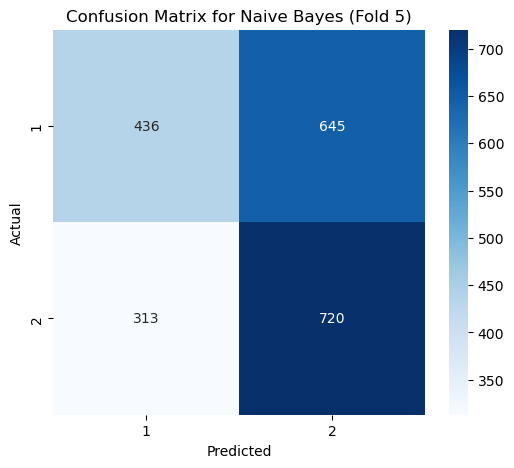

Average Accuracy for Naive Bayes: 55.90%

Model: K-Nearest Neighbors
Fold 1 Accuracy: 76.54%
Classification Report for K-Nearest Neighbors (Fold 1):
              precision    recall  f1-score   support

           1       0.77      0.75      0.76      1049
           2       0.76      0.78      0.77      1065

    accuracy                           0.77      2114
   macro avg       0.77      0.77      0.77      2114
weighted avg       0.77      0.77      0.77      2114



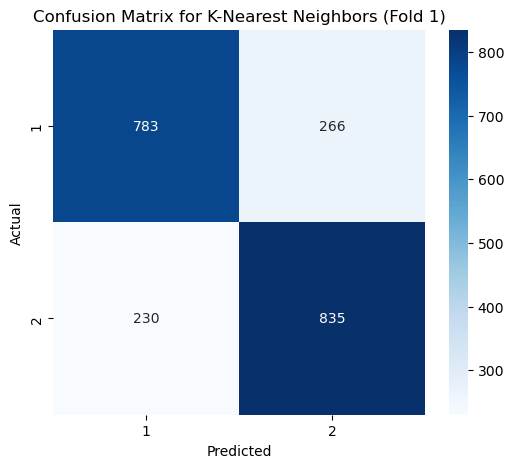

Fold 2 Accuracy: 76.25%
Classification Report for K-Nearest Neighbors (Fold 2):
              precision    recall  f1-score   support

           1       0.76      0.75      0.76      1042
           2       0.76      0.77      0.77      1072

    accuracy                           0.76      2114
   macro avg       0.76      0.76      0.76      2114
weighted avg       0.76      0.76      0.76      2114



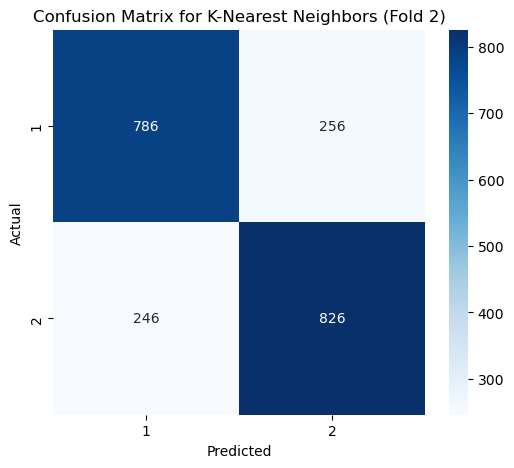

Fold 3 Accuracy: 76.11%
Classification Report for K-Nearest Neighbors (Fold 3):
              precision    recall  f1-score   support

           1       0.77      0.75      0.76      1056
           2       0.75      0.78      0.76      1058

    accuracy                           0.76      2114
   macro avg       0.76      0.76      0.76      2114
weighted avg       0.76      0.76      0.76      2114



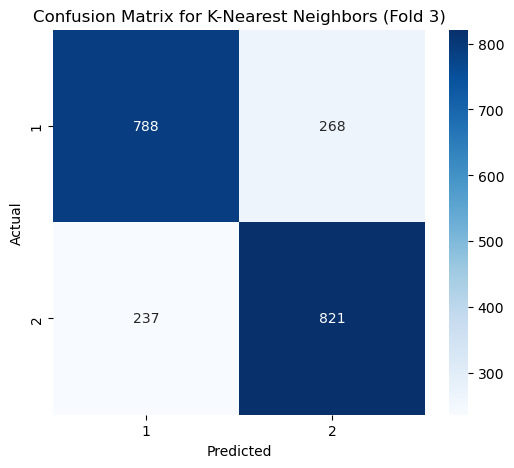

Fold 4 Accuracy: 75.35%
Classification Report for K-Nearest Neighbors (Fold 4):
              precision    recall  f1-score   support

           1       0.75      0.77      0.76      1057
           2       0.76      0.74      0.75      1057

    accuracy                           0.75      2114
   macro avg       0.75      0.75      0.75      2114
weighted avg       0.75      0.75      0.75      2114



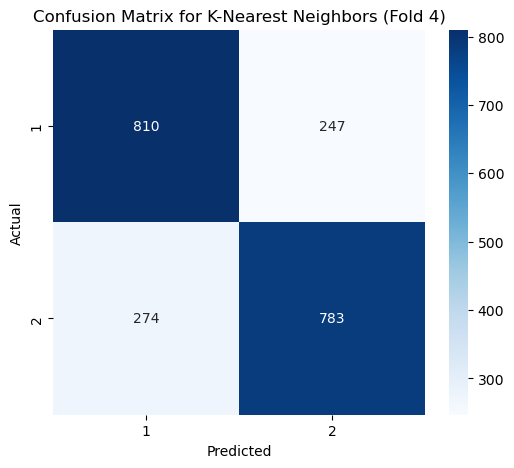

Fold 5 Accuracy: 74.93%
Classification Report for K-Nearest Neighbors (Fold 5):
              precision    recall  f1-score   support

           1       0.77      0.73      0.75      1081
           2       0.73      0.77      0.75      1033

    accuracy                           0.75      2114
   macro avg       0.75      0.75      0.75      2114
weighted avg       0.75      0.75      0.75      2114



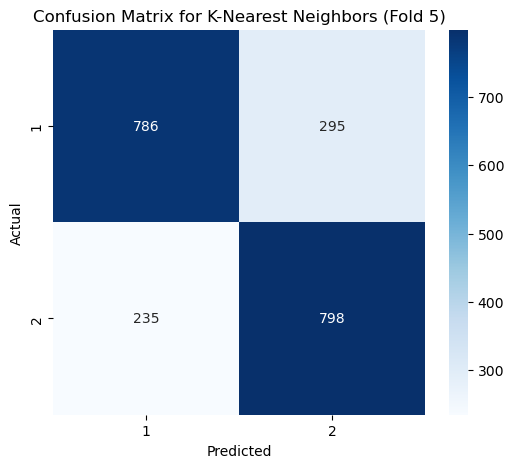

Average Accuracy for K-Nearest Neighbors: 75.84%


In [ ]:
models = {
    "Logistic Regression": improved_log_model,
    "Naive Bayes": grid_model,
    "K-Nearest Neighbors": knn_classifier
}

# K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through each model
for model_name, model in models.items():
    accuracies = []
    print(f"\nModel: {model_name}")
    
    # Perform K-Fold Cross-Validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        # Use indexing for NumPy arrays
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict using the model
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        print(f"Fold {fold} Accuracy: {accuracy * 100:.2f}%")
        
        # Print classification report
        print(f"Classification Report for {model_name} (Fold {fold}):")
        print(classification_report(y_test, y_pred, zero_division=1))
        
        # Generate and display confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.title(f'Confusion Matrix for {model_name} (Fold {fold})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    # Average accuracy over all folds
    avg_accuracy = np.mean(accuracies) * 100
    print(f"Average Accuracy for {model_name}: {avg_accuracy:.2f}%")


# Insights and Conclusions

Training the model was easier than expected. With the use of Python libraries for the models, it was easier to search for the optimal hyperparameters, some of which were also found by the model's library. In contrast, the most difficult part was the preprocessing and feature extraction. Due to the number of features and instances present, preprocessing was tedious, with some values missing. The choice as well on which values to include took a while to compromise, especially when we weren't final with our task. However, other preprocessing was not needed due to some of the categorical values were already one-hot encoded and most features had uniform values so there was no need for extra effort to standardize the type of values for each feature. the data collection method used by PSADA was efficient enough. By limiting some of the survyes to likert scale or multiple choice, it was easier to understand the data and interpret it as a .csv file.

For this notebook, our group decided to use different training models: `KNN Classifier`, `Logistic Regression`, `Naive Bayes`, and `Neural Networks`. These 4 supervised machine learning models were used due to the fact that we believe it fits the most with our current task, which is **classification**. During the initial training, most of the models had low training and testing accuracy (averagely around 50%), only KNN Classifier had the highest results (71%). These were tested using k-folds where we train and run the model consecutively.

Due to this findings, it was evident we had to improve the model. Each model had different ways to improve it, however the most commonly one was adjusting the hyperparameters. Models like KNN Classifier heavily rely on this, adding cross-validation in order to find the best hyperparameter k. Logistic Regression on the other hand, used Optuna, a Bayesian optimization approach, to determine the hyperparameters for the best accuracy. Naive Bayes used the `GridSearchCV` for tuning the hyperparameter `var_smoothing`. After improving the model, the accuracy was again calculated through the use of k-folds. From the average of 50% for most models, it has now improved to 80% accuracy, with **Logistic Regression being the highest among all of them**. However, some models weren't improved as much, such as KNN Classifier, with only small improvements by 4% from the initial accuracy. Reason for this is that KNN does not work well with fairly large datasets such as this one, which has 10k+ instances. 

However, we think that there are other ways to improve the models stated here, other than hyperparameter tuning. Preprocessing is a huge factor in improving the model and along with preprocessing is the finalization of the kind of task. While we did the necessary preprocessing steps for our task, we still believe that this could be expounded further in order to improve the accuracy of the models stated. Additionally, we think that these 4 models are not the only ones recommended for this kind of task, since our lessons were only limited to selected machine learning models. To add, Exploratory Data Analysis proves to be a crucial step as well. The reason why we got to chose our kind of task is due to our EDA and visualization of the distribution of data. Without these pre-model steps, modelling and improving the machine learning model will be more difficult to implement.

# References

AI Tools were utilized for this work, namely ChatGPT.


Jain, K. (2021, Apr 2). How to Improve Naive Bayes?. Medium. Retrieved from https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

Gaussian Naive Bayes. (2025, Jan 29). GeeksforGeeks. Retrieved from https://www.geeksforgeeks.org/gaussian-naive-ba

Past notebook were used as a guide. These notebooks include:

K-Nearest Neighbors.ipynb
Additionally, short descriptions for the KNN metrics were taken from:

https://www.datacamp.com/tutorial/cosine-distance
https://www.datacamp.com/tutorial/cosine-distance
http://en.wikipedia.org/wiki/Taxicab_geometry
STINTSY slides provided in Canvases/